In [2]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


## Set up parameters, create isochrone grid

In [3]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F115W', 'jwst,F182M']
filters = ['m_jwst_F115W', 'm_jwst_F182M']
iso_dir = 'isochrones/'
metallicity = 0

In [4]:
# read nbody data
path_to_data = '../../../../../../storage/jfarias/Data/Orion/massive_clusters/M3000new/sigma1p0/fiducial/sfe_ff100/00/'
snapshot = Reader.read_snapshot(path_to_data, time = 1.5)

# convert snapshot values from nbody units to astrophysical, extract masses
snapshot.to_physical()

# read ages for simulated stars
cluster_table = converter.to_spicea_table(snapshot)

print(cluster_table)

        mass        isMultiple        compMass            systemMass             e                log_a               age        
------------------- ---------- --------------------- ------------------- ------------------ ------------------ ------------------
  56.24521950614411        0.0                    []   56.24521950614411                nan                nan  1.494411190854979
0.11411525852041825        0.0                    [] 0.11411525852041825                nan                nan 1.5011385289993755
  12.96283688892593        0.0                    []   12.96283688892593                nan                nan 1.4970749668953602
0.27321673034539384        0.0                    [] 0.27321673034539384                nan                nan 1.4964816285263873
                ...        ...                   ...                 ...                ...                ...                ...
0.20449300038109305        1.0 [0.11248395795903553] 0.31697695834012857   0.2989732941710

In [5]:
masses = cluster_table['mass']
level_ages = cluster_table['age']

for i in range(len(level_ages)):
    level_ages[i] = level_ages[i] * 1e6

# convert log ages from log(Myr) to log(yr)
log_ages = np.log10(level_ages)

# print(log_ages)
print("Min log age = " + str(min(log_ages)))
print("Max log age = " + str(max(log_ages)))

# print(level_ages)
print("Min level age = " + str(min(level_ages)))
print("Max level age = " + str(max(level_ages)))

Min log age = 6.172382928762329
Max log age = 6.182058450993647
Min level age = 1487246.4082493563
Max level age = 1520752.191543579


In [6]:
# find index of first binary, create array of companion masses
first_binary = 0
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        first_binary = i
        break
print(first_binary)

compMasses = []
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        compMasses.append(cluster_table['compMass'][i][0])
print(compMasses)

1440
[0.16312509029104827, 0.09636490446440792, 0.03636643773183382, 0.21849298240279427, 0.03651675631669997, 0.019132423710002903, 0.05933243108388687, 0.12247264926103713, 0.6385500001324462, 0.2022302569658592, 0.07471903553293849, 0.16814292142663018, 0.0230523225129767, 0.1609042880961581, 0.2688387764755287, 0.05549755459546917, 0.012694034520736917, 0.09389877662294215, 0.024808470564410257, 0.012916016567435117, 0.537538199511473, 0.10166459547430746, 0.017003778368234634, 0.1895631651814792, 0.011007644292289143, 0.1908368021249771, 0.16246922314167023, 0.09223736189469771, 0.08370963329421344, 0.5588908545309716, 0.03431704460795354, 0.045772770042914156, 0.15501195511789118, 0.026778635366288318, 0.02533061849344048, 0.044663360767730004, 0.05472224588958281, 0.028879488831018898, 0.1309257580510967, 0.11610612932071074, 0.7052331632631441, 0.42965823402192654, 0.09028542237526906, 0.08645685263723765, 0.6922198305107939, 0.5510788138832429, 0.014685248829668424, 0.02854885

0.45130458451281824
0.48234731411918647
0.5928619081991915
0.4443214453016388
0.7714629115210756
0.30115861091749774
0.641566495586671
0.878067724045461
0.5029225880666224
0.4581782644227275
0.668728558546791
0.9179676752631077
0.2260956202272256
0.5433931529209916
0.7025371159492041
0.300793622604748
0.3605981093023529
0.456623555514718
0.26456287740588713
0.7339112526586969
0.5725798340431761
0.4142764818731189
0.2881285168083706
0.4474651255571515
0.4312526970611348
0.6275226409765465
0.8932934934847182
0.531959490050218
0.4507707641677231
0.34033258293613844
0.5162679805067567
0.7478057740797067
0.6000393451780041
0.9496798837078608
0.5755928832475977
0.32264708566903866
0.8165625207859043
0.22659938964913856
0.7416136980321136
0.8486400415209682
0.8805544000510508
0.8480597700724617
0.6667848189240927
0.5365169788867533
0.9202393157093105
0.9990049876016515
0.6456365278155071
0.30118158836307307
0.990818093671527
0.49279612884202384
0.5509508964455135
0.8983640727089236
0.76682286

(array([  3.,  14.,  69., 121., 181., 124., 134., 141., 120., 132.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

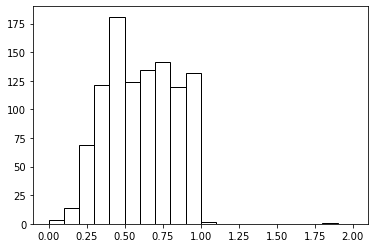

In [7]:
ratios = []
for i in range(len(compMasses)):
    ratios.append(compMasses[i] / masses[i + first_binary])
    print(ratios[i])

py.hist(ratios, bins=20, range=[0, 2], fill=False)

In [8]:
start = (min(level_ages) // 0.5e6) * 0.5e6
end = (max(level_ages) // 0.5e6) * 0.5e6 + 2 * 0.5e6
increment = 0.5e6  # 500,000

# Create age arrays
level_age_arr = np.arange(start, end, increment)
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[6.         6.17609126 6.30103   ]
[1000000. 1500000. 2000000.]


In [9]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

isochrone generation done


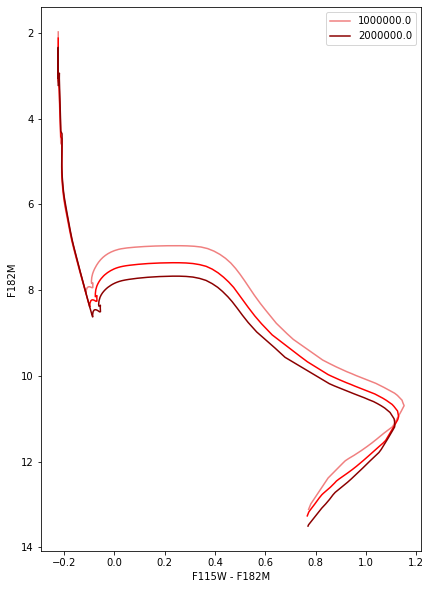

In [10]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))
if len(idx_arr) > 3:
    idx_arr = idx_arr[::2]

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

In [11]:
import sys
sys.path.append('/scratch/wyz5rge/synthetic-hr/12-18')
import interpolatorExp as interpolator

level_ages_myr = level_ages / 1e6
# print(level_ages_myr)

# create array of stars
stars = np.empty(len(cluster_table), dtype=object)

# perform interpolation for each star
for i in range(len(stars)):
    # print(str(i) + " " + str(level_ages_myr[i]) + " " + str(masses[i]))
    stars[i] = interpolator.interpolate(level_ages_myr[i], masses[i], instances, log_age_arr, filters)
    
# convert luminosity values to solar luminosities
watts_to_lsun = 1.0 / (3.846e26) # conversion factor for watts to Lsun

for i in range(len(stars)):
    if stars[i] is None:
        continue
    stars[i][0] = stars[i][0] * watts_to_lsun
    
for i in range(len(stars)):
    print(stars[i])


Desired mass 0.07746465814392134 is outside the range of the isochrone.
Desired mass 0.07746465814392134 is outside the range of the isochrone.
Desired mass 0.08466339817270757 is outside the range of the isochrone.
Desired mass 0.08466339817270757 is outside the range of the isochrone.
Desired mass 0.08217508690946722 is outside the range of the isochrone.
Desired mass 0.08217508690946722 is outside the range of the isochrone.
Desired mass 0.09649129577108034 is outside the range of the isochrone.
Desired mass 0.09649129577108034 is outside the range of the isochrone.
Desired mass 0.0428821459115702 is outside the range of the isochrone.
Desired mass 0.0428821459115702 is outside the range of the isochrone.
Desired mass 0.09262585734238067 is outside the range of the isochrone.
Desired mass 0.09262585734238067 is outside the range of the isochrone.
Desired mass 0.07831495046053252 is outside the range of the isochrone.
Desired mass 0.07831495046053252 is outside the range of the isoch

Desired mass 0.03014186935521681 is outside the range of the isochrone.
Desired mass 0.03014186935521681 is outside the range of the isochrone.
Desired mass 0.10097900469865115 is outside the range of the isochrone.
Desired mass 0.10097900469865115 is outside the range of the isochrone.
Desired mass 0.0553177452801152 is outside the range of the isochrone.
Desired mass 0.0553177452801152 is outside the range of the isochrone.
Desired mass 0.02562076937751874 is outside the range of the isochrone.
Desired mass 0.02562076937751874 is outside the range of the isochrone.
Desired mass 0.027256583374155888 is outside the range of the isochrone.
Desired mass 0.027256583374155888 is outside the range of the isochrone.
Desired mass 0.026593054364861094 is outside the range of the isochrone.
Desired mass 0.026593054364861094 is outside the range of the isochrone.
Desired mass 0.06172100454568863 is outside the range of the isochrone.
Desired mass 0.06172100454568863 is outside the range of the i

Desired mass 0.054994031065844814 is outside the range of the isochrone.
Desired mass 0.054994031065844814 is outside the range of the isochrone.
Desired mass 0.04044839321414944 is outside the range of the isochrone.
Desired mass 0.04044839321414944 is outside the range of the isochrone.
Desired mass 0.10449443997659066 is outside the range of the isochrone.
Desired mass 0.08152095635521138 is outside the range of the isochrone.
Desired mass 0.08152095635521138 is outside the range of the isochrone.
Desired mass 0.09390489245804319 is outside the range of the isochrone.
Desired mass 0.09390489245804319 is outside the range of the isochrone.
Desired mass 0.07224288306638207 is outside the range of the isochrone.
Desired mass 0.07224288306638207 is outside the range of the isochrone.
Desired mass 0.05705773085355759 is outside the range of the isochrone.
Desired mass 0.05705773085355759 is outside the range of the isochrone.
Desired mass 0.028965066193342718 is outside the range of the 

Desired mass 0.10024156851122062 is outside the range of the isochrone.
Desired mass 0.10024156851122062 is outside the range of the isochrone.
Desired mass 0.10477128472621576 is outside the range of the isochrone.
Desired mass 0.024277482168087734 is outside the range of the isochrone.
Desired mass 0.024277482168087734 is outside the range of the isochrone.
Desired mass 0.06886850129428883 is outside the range of the isochrone.
Desired mass 0.06886850129428883 is outside the range of the isochrone.
Desired mass 0.04873664380881346 is outside the range of the isochrone.
Desired mass 0.04873664380881346 is outside the range of the isochrone.
Desired mass 0.06165178602454812 is outside the range of the isochrone.
Desired mass 0.06165178602454812 is outside the range of the isochrone.
Desired mass 0.03082748983403767 is outside the range of the isochrone.
Desired mass 0.03082748983403767 is outside the range of the isochrone.
Desired mass 0.053439728915691376 is outside the range of the 

Desired mass 0.06231187544093537 is outside the range of the isochrone.
Desired mass 0.06231187544093537 is outside the range of the isochrone.
Desired mass 0.07798448014901543 is outside the range of the isochrone.
Desired mass 0.07798448014901543 is outside the range of the isochrone.
Desired mass 0.07133343124205063 is outside the range of the isochrone.
Desired mass 0.07133343124205063 is outside the range of the isochrone.
Desired mass 0.020664632911421357 is outside the range of the isochrone.
Desired mass 0.020664632911421357 is outside the range of the isochrone.
Desired mass 0.03095918503029858 is outside the range of the isochrone.
Desired mass 0.03095918503029858 is outside the range of the isochrone.
Desired mass 0.01796378525492406 is outside the range of the isochrone.
Desired mass 0.01796378525492406 is outside the range of the isochrone.
Desired mass 0.030872838085765696 is outside the range of the isochrone.
Desired mass 0.030872838085765696 is outside the range of the

Desired mass 0.08048321781386228 is outside the range of the isochrone.
Desired mass 0.08048321781386228 is outside the range of the isochrone.
Desired mass 0.019522831375198228 is outside the range of the isochrone.
Desired mass 0.019522831375198228 is outside the range of the isochrone.
Desired mass 0.08618607128906329 is outside the range of the isochrone.
Desired mass 0.08618607128906329 is outside the range of the isochrone.
Desired mass 0.1027749772087017 is outside the range of the isochrone.
Desired mass 0.1027749772087017 is outside the range of the isochrone.
Desired mass 0.047458667059310664 is outside the range of the isochrone.
Desired mass 0.047458667059310664 is outside the range of the isochrone.
Desired mass 0.03067455456694522 is outside the range of the isochrone.
Desired mass 0.03067455456694522 is outside the range of the isochrone.
Desired mass 0.06525805698015032 is outside the range of the isochrone.
Desired mass 0.06525805698015032 is outside the range of the i

Desired mass 0.05169602170176272 is outside the range of the isochrone.
Desired mass 0.05169602170176272 is outside the range of the isochrone.
Desired mass 0.02291531801993665 is outside the range of the isochrone.
Desired mass 0.02291531801993665 is outside the range of the isochrone.
Desired mass 0.06701314403302147 is outside the range of the isochrone.
Desired mass 0.06701314403302147 is outside the range of the isochrone.
Desired mass 0.03707315472799378 is outside the range of the isochrone.
Desired mass 0.03707315472799378 is outside the range of the isochrone.
Desired mass 0.055982036779660696 is outside the range of the isochrone.
Desired mass 0.055982036779660696 is outside the range of the isochrone.
Desired mass 0.060013631716157555 is outside the range of the isochrone.
Desired mass 0.060013631716157555 is outside the range of the isochrone.
Desired mass 0.04136073567258041 is outside the range of the isochrone.
Desired mass 0.04136073567258041 is outside the range of the

Desired mass 0.061952684017598576 is outside the range of the isochrone.
Desired mass 0.061952684017598576 is outside the range of the isochrone.
Desired mass 0.03760312225155263 is outside the range of the isochrone.
Desired mass 0.03760312225155263 is outside the range of the isochrone.
Desired mass 0.011808213641946919 is outside the range of the isochrone.
Desired mass 0.011808213641946919 is outside the range of the isochrone.
Desired mass 0.011780242462414306 is outside the range of the isochrone.
Desired mass 0.011780242462414306 is outside the range of the isochrone.
Desired mass 0.092327054412227 is outside the range of the isochrone.
Desired mass 0.092327054412227 is outside the range of the isochrone.
Desired mass 0.07885671279022805 is outside the range of the isochrone.
Desired mass 0.07885671279022805 is outside the range of the isochrone.
Desired mass 0.0948112707088174 is outside the range of the isochrone.
Desired mass 0.0948112707088174 is outside the range of the iso

Desired mass 0.06904287533502891 is outside the range of the isochrone.
Desired mass 0.06904287533502891 is outside the range of the isochrone.
Desired mass 0.09330813924143902 is outside the range of the isochrone.
Desired mass 0.09330813924143902 is outside the range of the isochrone.
Desired mass 0.09223555267727304 is outside the range of the isochrone.
Desired mass 0.09223555267727304 is outside the range of the isochrone.
Desired mass 0.037146193941227576 is outside the range of the isochrone.
Desired mass 0.037146193941227576 is outside the range of the isochrone.
Desired mass 0.06713698906497433 is outside the range of the isochrone.
Desired mass 0.06713698906497433 is outside the range of the isochrone.
Desired mass 0.025305122186674134 is outside the range of the isochrone.
Desired mass 0.025305122186674134 is outside the range of the isochrone.
Desired mass 0.036213668477602344 is outside the range of the isochrone.
Desired mass 0.036213668477602344 is outside the range of t

Desired mass 0.011845799338413548 is outside the range of the isochrone.
Desired mass 0.011845799338413548 is outside the range of the isochrone.
Desired mass 0.050391737745740295 is outside the range of the isochrone.
Desired mass 0.050391737745740295 is outside the range of the isochrone.
Desired mass 0.023176228714045736 is outside the range of the isochrone.
Desired mass 0.023176228714045736 is outside the range of the isochrone.
Desired mass 0.10226549225281018 is outside the range of the isochrone.
Desired mass 0.10226549225281018 is outside the range of the isochrone.
Desired mass 0.04544041104841983 is outside the range of the isochrone.
Desired mass 0.04544041104841983 is outside the range of the isochrone.
Desired mass 0.09687090866753678 is outside the range of the isochrone.
Desired mass 0.09687090866753678 is outside the range of the isochrone.
Desired mass 0.029557653208335054 is outside the range of the isochrone.
Desired mass 0.029557653208335054 is outside the range of

Desired mass 0.022090555891192243 is outside the range of the isochrone.
Desired mass 0.022090555891192243 is outside the range of the isochrone.
Desired mass 0.0676608861746438 is outside the range of the isochrone.
Desired mass 0.0676608861746438 is outside the range of the isochrone.
Desired mass 0.05065509994012071 is outside the range of the isochrone.
Desired mass 0.05065509994012071 is outside the range of the isochrone.
Desired mass 0.09007336797591695 is outside the range of the isochrone.
Desired mass 0.09007336797591695 is outside the range of the isochrone.
Desired mass 0.037294524692833314 is outside the range of the isochrone.
Desired mass 0.037294524692833314 is outside the range of the isochrone.
Desired mass 0.024006097850864123 is outside the range of the isochrone.
Desired mass 0.024006097850864123 is outside the range of the isochrone.
Desired mass 0.05722340100015755 is outside the range of the isochrone.
Desired mass 0.05722340100015755 is outside the range of the

Desired mass 0.08003283349859563 is outside the range of the isochrone.
Desired mass 0.08003283349859563 is outside the range of the isochrone.
Desired mass 0.012830863725706305 is outside the range of the isochrone.
Desired mass 0.012830863725706305 is outside the range of the isochrone.
Desired mass 0.01592489158291225 is outside the range of the isochrone.
Desired mass 0.01592489158291225 is outside the range of the isochrone.
Desired mass 0.021059727735743935 is outside the range of the isochrone.
Desired mass 0.021059727735743935 is outside the range of the isochrone.
Desired mass 0.09981193244319352 is outside the range of the isochrone.
Desired mass 0.09981193244319352 is outside the range of the isochrone.
Desired mass 0.03252210208887742 is outside the range of the isochrone.
Desired mass 0.03252210208887742 is outside the range of the isochrone.
Desired mass 0.0747174367732944 is outside the range of the isochrone.
Desired mass 0.0747174367732944 is outside the range of the i

Desired mass 0.09602928148894702 is outside the range of the isochrone.
Desired mass 0.025253044888206278 is outside the range of the isochrone.
Desired mass 0.025253044888206278 is outside the range of the isochrone.
Desired mass 0.07631065831087064 is outside the range of the isochrone.
Desired mass 0.07631065831087064 is outside the range of the isochrone.
Desired mass 0.04414260221257907 is outside the range of the isochrone.
Desired mass 0.04414260221257907 is outside the range of the isochrone.
Desired mass 0.0975850246988525 is outside the range of the isochrone.
Desired mass 0.0975850246988525 is outside the range of the isochrone.
Desired mass 0.05108577716759136 is outside the range of the isochrone.
Desired mass 0.05108577716759136 is outside the range of the isochrone.
Desired mass 0.03381310089014835 is outside the range of the isochrone.
Desired mass 0.03381310089014835 is outside the range of the isochrone.
Desired mass 0.06184639983825737 is outside the range of the iso

[452.0515622817101, 16717.388, 4.308, 8.026, 8.136]
None
[1.1126613509431054, 4263.201, 3.794, 11.37, 10.362]
None
None
None
[0.23079371071613364, 3404.715, 3.635, 12.797, 11.766]
[1.0556780710373102, 4230.111, 3.79, 11.421, 10.398]
[0.613921617880977, 3907.09, 3.748, 11.938, 10.814]
[2.5209974506901527, 4725.722, 3.825, 10.592, 9.793]
[0.1205076607378663, 3178.613, 3.57, 13.389, 12.515]
[0.3474137449142587, 3592.298, 3.682, 12.436, 11.341]
None
[0.10019439271507427, 3109.1, 3.537, 13.562, 12.728]
[0.24202167753900766, 3422.971, 3.639, 12.754, 11.714]
None
[0.14787706507194176, 3249.297, 3.595, 13.2, 12.273]
[3.204312472681966, 4850.107, 3.816, 10.343, 9.595]
None
None
None
[1.1962148346370247, 4310.589, 3.802, 11.3, 10.314]
None
[0.09004200518247683, 3074.316, 3.523, 13.664, 12.847]
None
[0.9071775839236104, 4136.367, 3.779, 11.568, 10.506]
None
[0.8637175173584356, 4106.943, 3.776, 11.615, 10.542]
[0.14747009298893762, 3247.421, 3.593, 13.202, 12.277]
None
[1.1811614814501414, 4301.7

Desired mass 0.09636490446440792 is outside the range of the isochrone.
Desired mass 0.09636490446440792 is outside the range of the isochrone.
Desired mass 0.07471903553293849 is outside the range of the isochrone.
Desired mass 0.07471903553293849 is outside the range of the isochrone.
Desired mass 0.05549755459546917 is outside the range of the isochrone.
Desired mass 0.05549755459546917 is outside the range of the isochrone.
Desired mass 0.09389877662294215 is outside the range of the isochrone.
Desired mass 0.09389877662294215 is outside the range of the isochrone.
Desired mass 0.10166459547430746 is outside the range of the isochrone.
Desired mass 0.10166459547430746 is outside the range of the isochrone.
Desired mass 0.09223736189469771 is outside the range of the isochrone.
Desired mass 0.09223736189469771 is outside the range of the isochrone.
Desired mass 0.08370963329421344 is outside the range of the isochrone.
Desired mass 0.08370963329421344 is outside the range of the iso

(array([  3.,   1.,  18.,  64.,  95., 122., 111.,  98., 110., 104.,  87.,
         94.,  97.,  37.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.   , 0.075, 0.15 , 0.225, 0.3  , 0.375, 0.45 , 0.525, 0.6  ,
        0.675, 0.75 , 0.825, 0.9  , 0.975, 1.05 , 1.125, 1.2  , 1.275,
        1.35 , 1.425, 1.5  ]),
 <BarContainer object of 20 artists>)

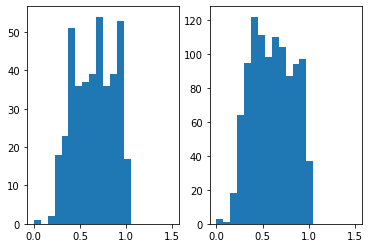

In [12]:
# perform interpolation on companion stars
companions = np.empty(len(compMasses), dtype=object)

for i in range(len(companions)):
    if stars[i + first_binary] is None:
        continue
    companions[i] = interpolator.interpolate(level_ages_myr[i + first_binary], compMasses[i], instances, log_age_arr, filters)

for i in range(len(companions)):
    if companions[i] is None:
        continue
    companions[i][0] = companions[i][0] * watts_to_lsun
    
count = 0
for i in range(len(companions)):
    if companions[i] is None:
        count = count + 1
        continue
    print(companions[i])

print(count)
print(len(companions))

new_ratios = []
for i in range(len(companions)):
    if companions[i] is None:
        continue
    new_ratios.append(compMasses[i] / masses[i + first_binary])

py.subplot(1,2,1)
py.hist(new_ratios, bins=20, range=[0, 1.5])
py.subplot(1,2,2)
py.hist(ratios, bins=20, range=[0,1.5])

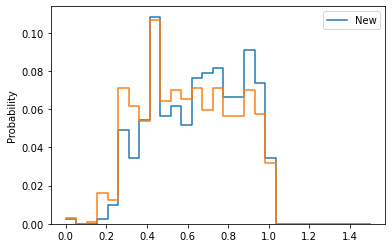

In [13]:
import seaborn as sns

bins = np.linspace(0, 1.5, 30)

sns.histplot(new_ratios, bins=bins, stat='probability', element='step', cumulative=False, fill=False, label="New")
sns.histplot(ratios, bins=bins, stat='probability', element='step', cumulative=False, fill=False)
plt.legend()

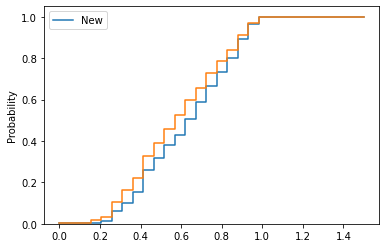

In [14]:
sns.histplot(new_ratios, bins=bins, stat='probability', element='step', cumulative=True, fill=False, label="New")
sns.histplot(ratios, bins=bins, stat='probability', element='step', cumulative=True, fill=False)
plt.legend()

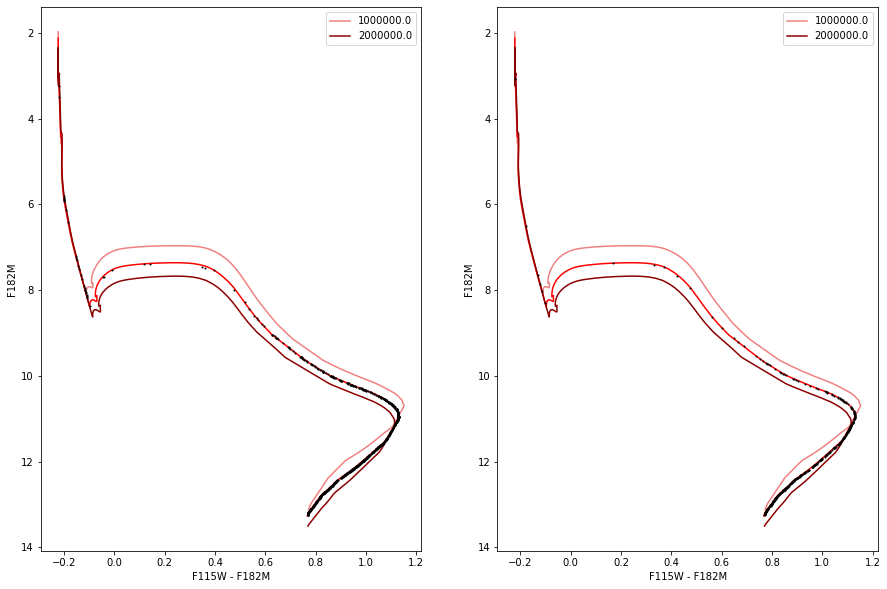

In [15]:
# plot primaries and companions separately
fig, axes = py.subplots(figsize=(15, 10))

# plot primaries
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
for i in range(0, first_binary):
    if stars[i] is None:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

# plot companions
py.subplot(1, 2, 2)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
        
for i in range(len(companions)):
    if companions[i] is None:
        continue
    py.plot(companions[i][3] - companions[i][4], companions[i][4], marker='o', markersize=1, color='k')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

2.301441817408514
2.4322040090738213
1.177063790780567
2.8183829312644546
2.3184620954131248
1.088428737943595
1.8793168168032686
1.4709570767969777
2.2552775667452445
2.3702818991297834
1.6383247796286406
1.1178923907117466
4.975079213514413
1.6764862660738977
1.3576880641390932
1.2246161992650462
1.2078138351067798
1.2078138351067795
1.1282361216489916
1.0009214583192978
1.4242951649732905
4.604685783785738
2.535128630497907
2.392213847512055
1.2542958923023175
1.0656142021585204
3.429256732975605
1.0854254493068274
1.2111557629827348
1.5588344677043875
3.18859969338639
2.427727847680999
3.429256732975598
1.4427796231294792
1.342764961137864
2.754228703338169
1.7831997722329165
1.0346655758424375
2.8840315031266055
1.0934526967309206
2.542143136204938
1.0327614057613979
3.718775833249359
1.1868613846449192
2.558585886905648
1.0251797048255566
3.061963433690675
1.79308137708044
4.475071720476552
1.1365799747501526
2.049273858380245
1.165198723025
1.4763862777538626
1.228004617988788
3

(array([  0.,   3.,   2., 129.,  81.,  47.,  30.,  34.,  13.,  15.,  17.,
          7.,   8.,   5.,   2.,   4.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
         1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
         3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
         5.        ,  5.33333333,  5.66666667,  6.        ,  6.33333333,
         6.66666667,  7.        ,  7.33333333,  7.66666667,  8.        ,
         8.33333333,  8.66666667,  9.        ,  9.33333333,  9.66666667,
        10.        ]),
 <BarContainer object of 30 artists>)

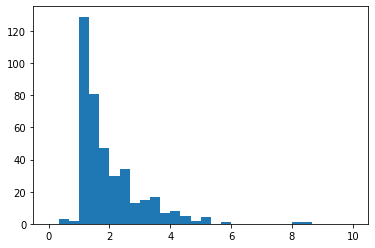

In [16]:
# combine magnitudes on binary stars
unresolved_binaries = np.empty(len(companions), dtype=object)

flux_ratios = []

for i in range(len(companions)):
    if stars[i + first_binary] is None or companions[i] is None:
        continue
    
    flux11 = np.power(10, stars[i + first_binary][3] / -2.5) * 3.93e-10
    flux21 = np.power(10, companions[i][3] / -2.5) * 3.93e-10
    flux_ratios.append(flux11 / flux21)
    mag1 = -2.5 * np.log10((flux11 + flux21) / 3.93e-10)
    
    flux12 = np.power(10, stars[i + first_binary][4] / -2.5) * 7.44e-11
    flux22 = np.power(10, companions[i][4] / -2.5) * 7.44e-11
    mag2 = -2.5 * np.log10((flux12 + flux22) / 7.44e-11)
    
    unresolved_binaries[i] = [mag1, mag2]

'''
for i in range(len(unresolved_binaries)):
    print(unresolved_binaries[i])
'''

for i in range(len(flux_ratios)):
    print(flux_ratios[i])
py.hist(flux_ratios, bins=30, range=[0,10])

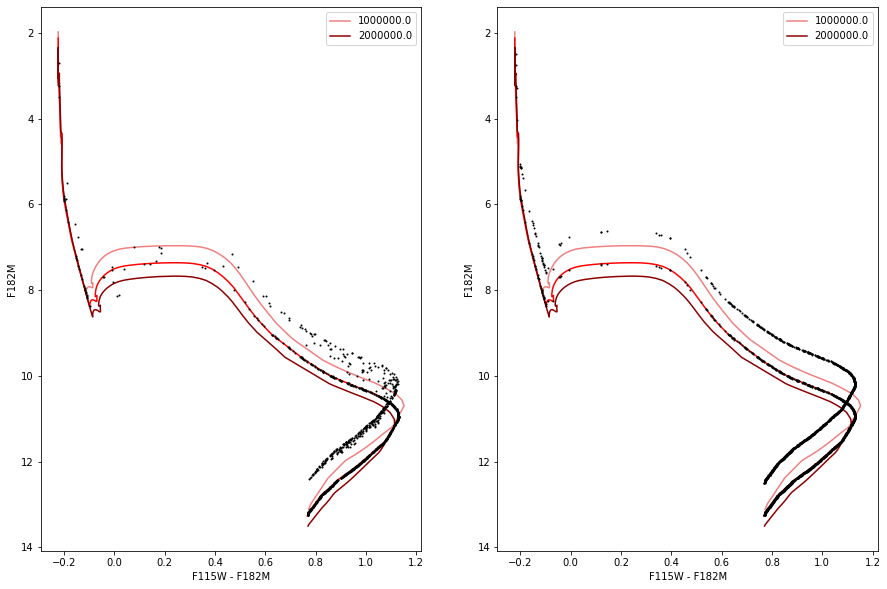

In [19]:
fig, axes = py.subplots(figsize=(15, 10))

# plot CMD
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

for i in range(0, first_binary):
    if stars[i] is None:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
    
for i in range(len(unresolved_binaries)):
    if unresolved_binaries[i] is None:
        continue
    py.plot(unresolved_binaries[i][0] - unresolved_binaries[i][1], unresolved_binaries[i][1], marker='o', markersize=1, color='k')
    
# plot toy scalar multiple track
py.subplot(1, 2, 2)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

for i in range(len(stars)):
    if stars[i] is None:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
    
for i in range(len(stars)):
    if stars[i] is None:
        continue
    x = -2.5 * np.log10(2 * np.power(10, stars[i][4] / -2.5))
    py.plot(stars[i][3] - stars[i][4], x, marker='o', markersize=1, color='k')